In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


In [8]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]      # Number of training images
Nte = x_test.shape[0]       # Number of test images
Din = 3072 # CIFAR10        # 3x32x32 (32x32 colour image)
# Din = 784 # MINIST
# Normalize pixel values
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Create weight and bias arrays
H=200       # Number of hidden nodes
std=1e-5
w1 = (2/(Ntr*Din))**0.5*np.random.randn(Din, H)  #get std value from (2/(Ntr*Din))**0.5 
w2 = (2/(Ntr*H))**0.5*np.random.randn(H, K)      #get std value from (2/(Ntr*H))**0.5
b1 = np.zeros(H)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = 500


w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)


In [9]:
iterations =  300
lr = 1.3e-4         #learning rate
lr_decay=0.999      #learning rate decay
reg = 5e-6
train_loss_history = []     #loss of training set at each iteration 
test_loss_history = []      #loss of test set at each iteration 
train_acc_history = []      #accuracy of training set at each iteration 
val_acc_history = []        #accuracy of test set at each iteration
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    
    indices = np.random.choice(Ntr, batch_size, replace=False)
    rng.shuffle(indices)
    x_t = x_train[indices]
    y_t = y_train[indices]
    N=int(Ntr/batch_size)       #Number of batches
    x_b=np.array_split(x_t, N)  #Split x_t to batches
    y_b=np.array_split(y_t, N)  #Split y_t to batches
    train_loss=0
    train_acc=0
    for i in range(N):
        
        # Forward pass
        h=1.0/(1.0 +np.exp(-(x_b[i].dot(w1) + b1)))
        y_pred_t = h.dot(w2) + b2

        #Calculate batch loss 
        batch_loss=1./batch_size*np.square(y_pred_t-y_b[i]).sum() + reg* (np.sum(w2*w2)+np.sum(w1*w1))
        train_loss += batch_loss
        #Calculate batch accuracy 
        batch_acc= (1/batch_size)*(np.abs(np.argmax(y_b[i], axis=1)==np.argmax(y_pred_t, axis=1))).sum()
        train_acc += batch_acc
        
        #backward pass
        dy_pred=1./batch_size*2.0*(y_pred_t-y_b[i])
        dw2=h.T.dot(dy_pred)+reg*w2
        db2=dy_pred.sum(axis=0)
        dh=dy_pred.dot(w2.T)
        dw1=x_b[i].T.dot(dh*h*(1-h)) + reg*w1
        db1=(dh*h*(1-h)).sum(axis=0)

        w1 -= lr*dw1
        w2 -= lr*dw2
        b1 -= lr*db1
        b2 -= lr*db2

    #Get mean of batch losses and batch accuracies and put them to coressponding list
    train_loss_history.append(train_loss/N)
    train_acc_history.append(train_acc/N)

    
    h_test=1.0/(1.0 +np.exp(-(x_test.dot(w1) + b1)))
    y_pred_v = h_test.dot(w2) + b2    

    #Calculate testing loss and put values to corresponding list
    test_loss = 1./Nte*np.square(y_pred_v-y_test).sum() + reg* (np.sum(w2*w2)+np.sum(w1*w1))
    test_loss_history.append(test_loss)

    #Calculate testing accuracy and put values to corresponding list

    val_acc=(1/Nte)*(np.abs(np.argmax(y_test, axis=1)==np.argmax(y_pred_v, axis=1))).sum()
    val_acc_history.append(val_acc)

    if t%10==9 or t==0 :
        print('Epochs %d / %d , learning rate: %f , train loss %f , test loss %f , train accuracy %f , test accuracy %f' % (t+1, iterations, lr, train_loss, test_loss, train_acc, val_acc))
    # Backward pass
        
    lr *= lr_decay

Epochs 1 / 300 , learning rate: 0.000130 , train loss 0.997140 , test loss 0.995918 , train accuracy 0.074000 , test accuracy 0.100400
Epochs 10 / 300 , learning rate: 0.000129 , train loss 0.976192 , test loss 0.974663 , train accuracy 0.124000 , test accuracy 0.138000
Epochs 20 / 300 , learning rate: 0.000128 , train loss 0.957274 , test loss 0.956219 , train accuracy 0.172000 , test accuracy 0.192700
Epochs 30 / 300 , learning rate: 0.000126 , train loss 0.942854 , test loss 0.941939 , train accuracy 0.200000 , test accuracy 0.204300
Epochs 40 / 300 , learning rate: 0.000125 , train loss 0.931725 , test loss 0.930802 , train accuracy 0.174000 , test accuracy 0.208500
Epochs 50 / 300 , learning rate: 0.000124 , train loss 0.922391 , test loss 0.921972 , train accuracy 0.200000 , test accuracy 0.217200
Epochs 60 / 300 , learning rate: 0.000123 , train loss 0.915765 , test loss 0.914995 , train accuracy 0.214000 , test accuracy 0.229300
Epochs 70 / 300 , learning rate: 0.000121 , train

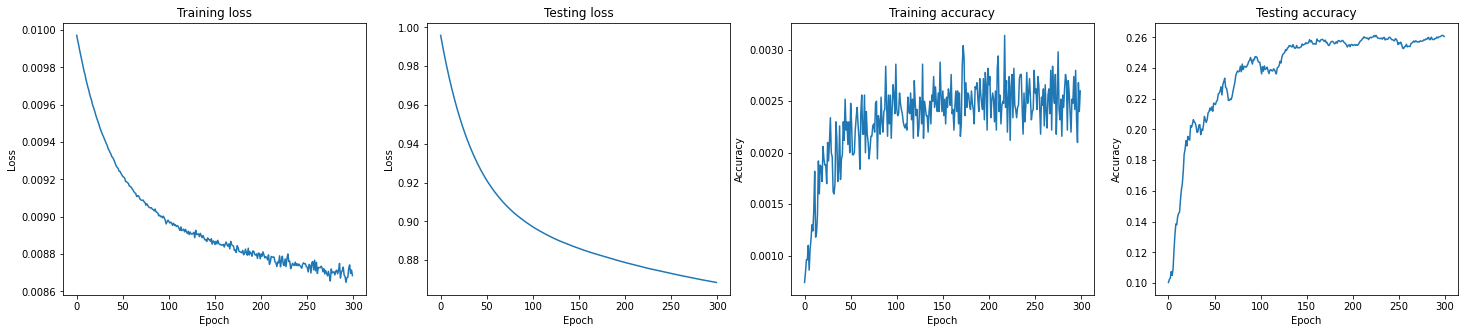

In [10]:
# Plotting losses and accuracies 
fig , ax = plt.subplots(figsize=(25,5 ))
plt.subplot(1,4,1)
plt.plot(train_loss_history)
plt.title("Training loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,4,2)
plt.plot(test_loss_history)
plt.title("Testing loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,4,3)
plt.plot(train_acc_history)
plt.title("Training accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,4,4)
plt.plot(val_acc_history)
plt.title("Testing accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

